# 导入工具包

In [1]:
import numpy as np
import pandas as pd

# 读取数据

In [44]:
import pandas as pd
import numpy as np

# 读取数据
edges = pd.read_csv("archive/edges.csv")
labels = pd.read_csv("archive/mbti_labels.csv")

# 定义16种MBTI类型
mbti_types = ['infj', 'intj', 'intp', 'infp', 'estj', 'esfj', 'entj', 'enfj', 'estp', 'esfp', 'entp', 'enfp', 'isfj', 'isfp', 'istj', 'istp']

# 合并MBTI类型到follower_id和followee_id上
edges_with_follower_mbti = edges.merge(labels, how='left', left_on='follower_id', right_on='id').drop('id', axis=1)
edges_with_both_mbti = edges_with_follower_mbti.merge(labels, how='left', left_on='followee_id', right_on='id', suffixes=('_follower', '_followee')).drop('id', axis=1)

print(edges_with_both_mbti)

              follower_id         followee_id mbti_personality_follower  \
0                 5660312          1654576440                      enfp   
1              1654576440             5660312                      intj   
2              3387707473          3020047310                      infj   
3      782987339425603584          3020047310                      infp   
4      832635154610860037          3020047310                      esfp   
...                   ...                 ...                       ...   
36461          1035710430  786014849918787584                      intj   
36462          2218253900           352673149                      entj   
36463           108459046           352673149                      enfp   
36464           352673149          2218253900                      intj   
36465           352673149           108459046                      intj   

      mbti_personality_followee  
0                          intj  
1                          enfp

In [59]:
import pandas as pd
import numpy as np

# 假设 df 是你的数据框，包含 'follower_id', 'followee_id', 'mbti_personality_follower', 'mbti_personality_followee'
df = edges_with_both_mbti  # 假设你已经加载了数据

# 获取所有独特的人格类型
unique_personalities = pd.concat([df['mbti_personality_follower'], df['mbti_personality_followee']]).unique()

# 创建一个人格类型到索引的映射
personality_to_idx = {personality: idx for idx, personality in enumerate(unique_personalities)}

# 初始化 16x16 的矩阵，所有值为 0
matrix = np.zeros((16, 16), dtype=int)

# 创建一个字典来存储每个 (follower_id, followee_id) 的关系
relationship_dict = {}

# 遍历数据，存储每个 (follower_id, followee_id) 的人格类型
for _, row in df.iterrows():
    follower_personality = row['mbti_personality_follower']
    followee_personality = row['mbti_personality_followee']
    follower_id = row['follower_id']
    followee_id = row['followee_id']
    
    # 存储该关系的正向（follower -> followee）
    relationship_dict[(follower_id, followee_id)] = (follower_personality, followee_personality)

# 遍历所有的关系，检查是否有反向关系
for (follower_id, followee_id), (follower_personality, followee_personality) in relationship_dict.items():
    # 检查反向关系 (followee_id, follower_id) 是否存在
    if (followee_id, follower_id) in relationship_dict:
        reverse_follower_personality, reverse_followee_personality = relationship_dict[(followee_id, follower_id)]
        
        # 如果反向关系的人格类型一致，则表示互相关注
        if reverse_follower_personality == followee_personality and reverse_followee_personality == follower_personality:
            # 获取对应的人格类型索引
            follower_idx = personality_to_idx[follower_personality]
            followee_idx = personality_to_idx[followee_personality]
            
            # 增加矩阵中的对应位置计数
            matrix[follower_idx, followee_idx] += 1
            matrix[followee_idx, follower_idx] += 1  # 对称更新
for _ in range(len(unique_personalities)):
    matrix[_][_]/=2
# 打印结果矩阵
# print("人格类型之间的互相关注次数矩阵 (对称矩阵):")
# print(matrix)

# 可选：将矩阵打印成更易读的形式
personality_names = list(personality_to_idx.keys())
df_matrix = pd.DataFrame(matrix, index=personality_names, columns=personality_names)
display(df_matrix)
df_matrix.to_csv("each_other.csv")

,enfp,intj,infj,infp,esfp,esfj,enfj,intp,entj,istj,estj,entp,isfj,isfp,istp,estp
enfp,496,506,1006,696,52,80,394,344,192,56,70,220,106,66,12,24
intj,506,548,1602,956,42,56,272,446,270,72,80,180,144,44,28,26
infj,1006,1602,2710,2122,84,66,514,750,382,148,104,378,256,116,42,12
infp,696,956,2122,844,38,70,358,586,174,92,58,238,178,98,36,16
esfp,52,42,84,38,20,34,42,50,38,10,12,32,18,14,2,8
esfj,80,56,66,70,34,22,50,42,38,14,30,36,32,12,20,10
enfj,394,272,514,358,42,50,182,192,138,38,62,134,94,48,18,18
intp,344,446,750,586,50,42,192,368,162,50,40,258,74,48,26,24
entj,192,270,382,174,38,38,138,162,136,36,54,112,30,26,16,6
istj,56,72,148,92,10,14,38,50,36,14,18,48,22,10,8,2


/var/folders/1n/4skwfl_n6gq3hxvc100399q80000gn/T/ipykernel_47499/1534519220.py:27: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.tight_layout()  # 自动调整布局以防止标签重叠
/var/folders/1n/4skwfl_n6gq3hxvc100399q80000gn/T/ipykernel_47499/1534519220.py:27: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  plt.tight_layout()  # 自动调整布局以防止标签重叠
/var/folders/1n/4skwfl_n6gq3hxvc100399q80000gn/T/ipykernel_47499/1534519220.py:27: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  plt.tight_layout()  # 自动调整布局以防止标签重叠
/var/folders/1n/4skwfl_n6gq3hxvc100399q80000gn/T/ipykernel_47499/1534519220.py:27: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  plt.tight_layout()  # 自动调整布局以防止标签重叠
/var/folders/1n/4skwfl_n6gq3hxvc100399q80000gn/T/ipykernel_47499/1534519220.py:27: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  plt.ti

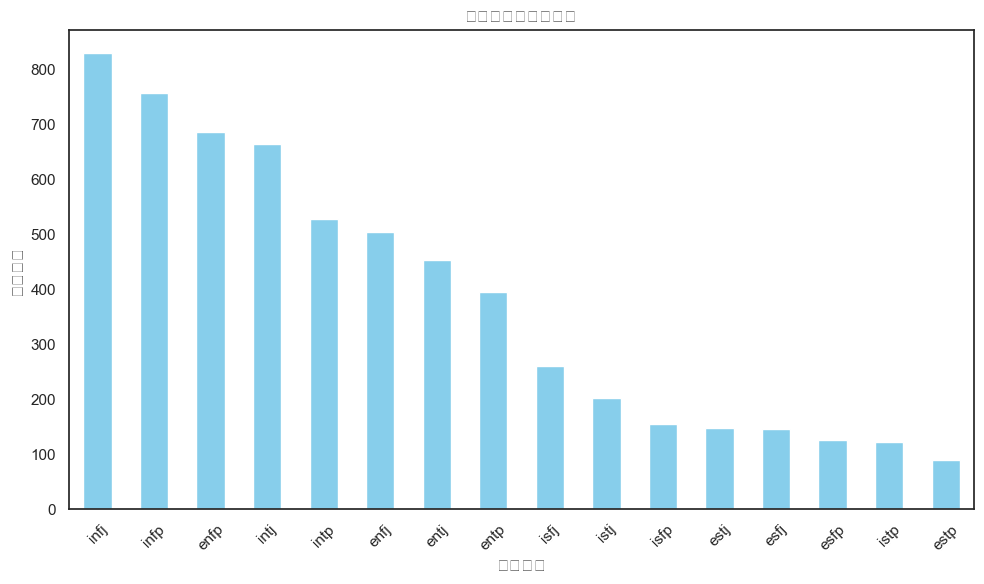

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 df 是你的数据框，包含 'follower_id', 'followee_id', 'mbti_personality_follower', 'mbti_personality_followee'
df = edges_with_both_mbti  # 假设你已经加载了数据

# 将 'follower_id' 和 'followee_id' 合并为一个列，以便统计
follower_personalities = df[['follower_id', 'mbti_personality_follower']].rename(columns={'follower_id': 'user_id', 'mbti_personality_follower': 'personality'})
followee_personalities = df[['followee_id', 'mbti_personality_followee']].rename(columns={'followee_id': 'user_id', 'mbti_personality_followee': 'personality'})

# 合并 follower 和 followee 的人格数据
all_personalities = pd.concat([follower_personalities, followee_personalities])

# 去重，确保每个用户只统计一次
unique_personalities = all_personalities.drop_duplicates(subset=['user_id'])

# 统计每个人格类型出现的次数
personality_counts = unique_personalities['personality'].value_counts()

# 绘制柱状图
plt.figure(figsize=(10, 6))  # 设置图像大小
personality_counts.plot(kind='bar', color='skyblue')  # 使用柱状图，并设置柱子的颜色
plt.title("人格类型的出现次数")  # 设置标题
plt.xlabel("人格类型")  # 设置x轴标签
plt.ylabel("出现次数")  # 设置y轴标签
plt.xticks(rotation=45)  # 设置x轴标签旋转角度
plt.tight_layout()  # 自动调整布局以防止标签重叠
plt.show()  # 显示图表


In [3]:
import pandas as pd
import numpy as np

# 读取数据
edges = pd.read_csv("archive/edges.csv")
labels = pd.read_csv("archive/mbti_labels.csv")

# 定义16种MBTI类型
mbti_types = ['infj', 'intj', 'intp', 'infp', 'estj', 'esfj', 'entj', 'enfj', 'estp', 'esfp', 'entp', 'enfp', 'isfj', 'isfp', 'istj', 'istp']

# 创建空的16x16矩阵，并将行和列的标签设置为MBTI类型
mbti_matrix = pd.DataFrame(np.zeros((16, 16), dtype=int), columns=mbti_types, index=mbti_types)

# 合并MBTI类型到follower_id和followee_id上
edges_with_follower_mbti = edges.merge(labels, how='left', left_on='follower_id', right_on='id').drop('id', axis=1)
edges_with_both_mbti = edges_with_follower_mbti.merge(labels, how='left', left_on='followee_id', right_on='id', suffixes=('_follower', '_followee')).drop('id', axis=1)

# 遍历每一行，记录不同MBTI之间的关注关系
for _, row in edges_with_both_mbti.iterrows():
    follower_mbti = row['mbti_personality_follower']
    followee_mbti = row['mbti_personality_followee']
    
    if follower_mbti in mbti_types and followee_mbti in mbti_types:
        # 增加对应位置的关注计数
        mbti_matrix.loc[follower_mbti, followee_mbti] += 1

# 打印结果
print(mbti_matrix)
# 将矩阵保存为 CSV 文件
mbti_matrix.to_csv("mbti_relationship_matrix.csv")


      infj  intj  intp  infp  estj  esfj  entj  enfj  estp  esfp  entp  enfp  \
infj  4150  1040   513  1501    78    56   266   363    12    52   261   671   
intj  1082   896   300   644    50    33   198   201    17    26   139   356   
intp   550   353   755   462    27    36   127   155    19    31   204   256   
infp  1535   710   432  1486    59    47   142   289    25    33   192   532   
estj    71    64    32    41    25    20    42    53     4     8    37    53   
esfj    62    46    45    69    22    47    28    46     6    22    31    73   
entj   281   236   120   151    42    27   267   106     9    23    88   140   
enfj   384   224   166   262    41    33   105   337    14    32    98   269   
estp    12    26    18    19     6     7    12    14    62     7    16    20   
esfp    65    32    44    37     7    18    26    32     5    40    30    46   
entp   338   177   228   202    36    35    86   106    15    27   589   183   
enfp   760   401   274   581    51    62

/Users/linshangjin/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from current font.
  fig.canvas.draw()
/Users/linshangjin/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.draw()
/Users/linshangjin/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.draw()
/var/folders/1n/4skwfl_n6gq3hxvc100399q80000gn/T/ipykernel_47499/3802364630.py:58: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  plt.tight_layout()
/var/folders/1n/4skwfl_n6gq3hxvc100399q80000gn/T/ipykernel_47499/3802364630.py:58: UserWarning: Glyph 27880 (\N{CJK UNIFIED IDEOGRAPH-6CE8}) missing from current font.
  plt.tight_layout()
/var/folders/1n/4skwfl_n6gq3hxvc100399q80000gn/T/ipykernel

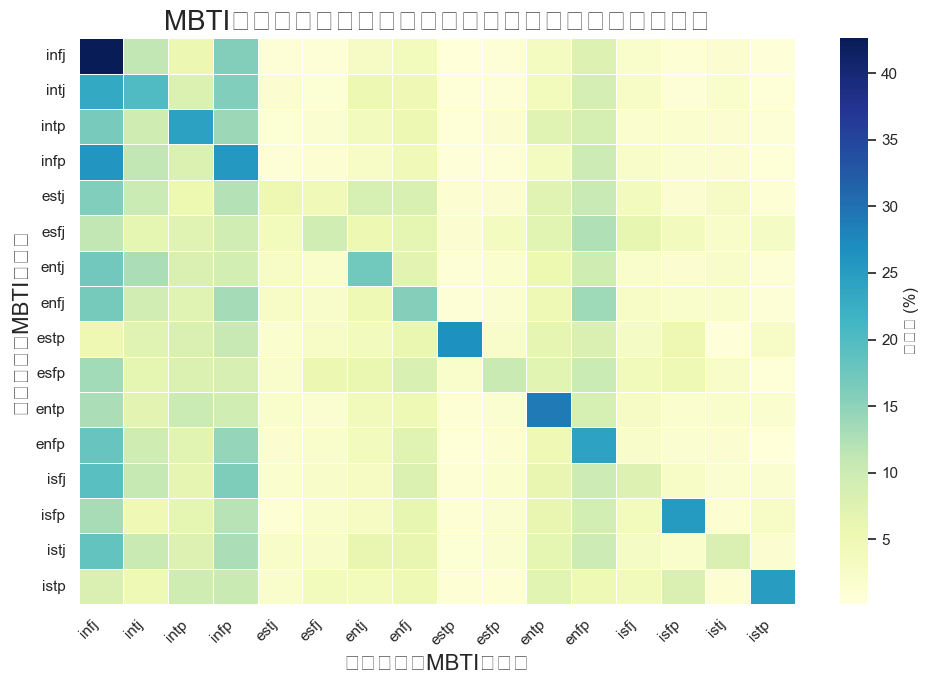

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建数据字典
data = {
    'infj': [4150, 1040, 513, 1501, 78, 56, 266, 363, 12, 52, 261, 671, 173, 81, 92, 27],
    'intj': [1082, 896, 300, 644, 50, 33, 198, 201, 17, 26, 139, 356, 97, 31, 52, 16],
    'intp': [550, 353, 755, 462, 27, 36, 127, 155, 19, 31, 204, 256, 58, 41, 38, 32],
    'infp': [1535, 710, 432, 1486, 59, 47, 142, 289, 25, 33, 192, 532, 145, 74, 64, 34],
    'estj': [71, 64, 32, 41, 25, 20, 42, 53, 4, 8, 37, 53, 16, 5, 12, 6],
    'esfj': [62, 46, 45, 69, 22, 47, 28, 46, 6, 22, 31, 73, 21, 13, 12, 13],
    'entj': [281, 236, 120, 151, 42, 27, 267, 106, 9, 23, 88, 140, 28, 20, 31, 13],
    'enfj': [384, 224, 166, 262, 41, 33, 105, 337, 14, 32, 98, 269, 72, 39, 31, 16],
    'estp': [12, 26, 18, 19, 6, 7, 12, 14, 62, 7, 16, 20, 8, 5, 5, 3],
    'esfp': [65, 32, 44, 37, 7, 18, 26, 32, 5, 40, 30, 46, 15, 10, 8, 3],
    'entp': [338, 177, 228, 202, 36, 35, 86, 106, 15, 27, 589, 183, 56, 38, 33, 23],
    'enfp': [760, 401, 274, 581, 51, 62, 151, 297, 19, 39, 176, 897, 90, 57, 50, 16],
    'isfj': [187, 112, 51, 136, 19, 32, 31, 60, 7, 16, 57, 79, 69, 25, 15, 14],
    'isfp': [90, 32, 54, 93, 7, 19, 22, 44, 12, 19, 33, 54, 22, 156, 9, 27],
    'istj': [137, 80, 40, 82, 14, 12, 35, 41, 1, 9, 39, 53, 14, 7, 41, 4],
    'istp': [34, 24, 23, 36, 4, 15, 12, 17, 6, 2, 33, 10, 14, 17, 7, 82]
}

# MBTI类型作为索引
mbti_types = ['infj', 'intj', 'intp', 'infp', 'estj', 'esfj', 'entj', 'enfj',
             'estp', 'esfp', 'entp', 'enfp', 'isfj', 'isfp', 'istj', 'istp']

# 创建DataFrame
matrix = pd.DataFrame(data, index=mbti_types)

# 按行归一化
matrix_normalized_row = matrix.div(matrix.sum(axis=1), axis=0) * 100

# 保存归一化后的数据
matrix_normalized_row.to_csv("matrix_normalized_row.csv")

# 设置Seaborn主题
sns.set_theme(style="white")

# 创建一个包含两个子图的画布
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

# 绘制按行归一化的热力图
sns.heatmap(matrix_normalized_row, annot=False, fmt=".1f", cmap="YlGnBu",
            linewidths=.5, ax=axes, cbar_kws={'label': '百分比 (%)'})

# 设置标题和轴标签
axes.set_title("MBTI类型在不同领域中的相对分布（按粉丝类型归一化）", fontsize=20)
axes.set_xlabel("关注的人（MBTI类型）", fontsize=16)
axes.set_ylabel("粉丝类型（MBTI类型）", fontsize=16)

# 调整x轴和y轴标签的显示角度
plt.setp(axes.get_xticklabels(), rotation=45, ha='right')
plt.setp(axes.get_yticklabels(), rotation=0)

# 显示图形
plt.tight_layout()
plt.show()


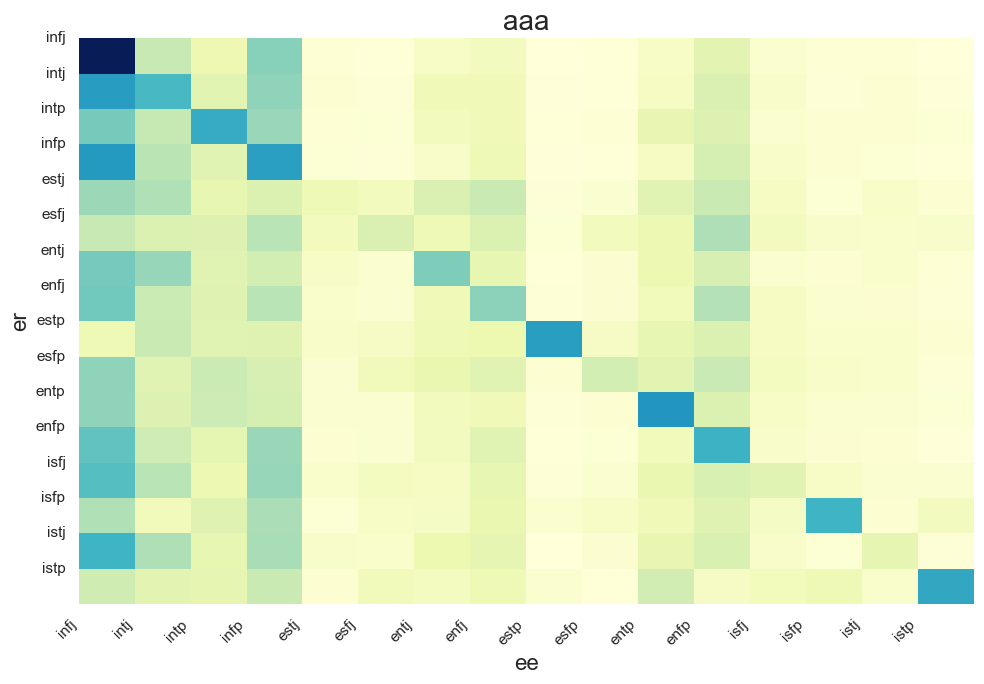

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# # 创建数据字典
# data = {
#     'infj': [4150, 1040, 513, 1501, 78, 56, 266, 363, 12, 52, 261, 671, 173, 81, 92, 27],
#     'intj': [1082, 896, 300, 644, 50, 33, 198, 201, 17, 26, 139, 356, 97, 31, 52, 16],
#     'intp': [550, 353, 755, 462, 27, 36, 127, 155, 19, 31, 204, 256, 58, 41, 38, 32],
#     'infp': [1535, 710, 432, 1486, 59, 47, 142, 289, 25, 33, 192, 532, 145, 74, 64, 34],
#     'estj': [71, 64, 32, 41, 25, 20, 42, 53, 4, 8, 37, 53, 16, 5, 12, 6],
#     'esfj': [62, 46, 45, 69, 22, 47, 28, 46, 6, 22, 31, 73, 21, 13, 12, 13],
#     'entj': [281, 236, 120, 151, 42, 27, 267, 106, 9, 23, 88, 140, 28, 20, 31, 13],
#     'enfj': [384, 224, 166, 262, 41, 33, 105, 337, 14, 32, 98, 269, 72, 39, 31, 16],
#     'estp': [12, 26, 18, 19, 6, 7, 12, 14, 62, 7, 16, 20, 8, 5, 5, 3],
#     'esfp': [65, 32, 44, 37, 7, 18, 26, 32, 5, 40, 30, 46, 15, 10, 8, 3],
#     'entp': [338, 177, 228, 202, 36, 35, 86, 106, 15, 27, 589, 183, 56, 38, 33, 23],
#     'enfp': [760, 401, 274, 581, 51, 62, 151, 297, 19, 39, 176, 897, 90, 57, 50, 16],
#     'isfj': [187, 112, 51, 136, 19, 32, 31, 60, 7, 16, 57, 79, 69, 25, 15, 14],
#     'isfp': [90, 32, 54, 93, 7, 19, 22, 44, 12, 19, 33, 54, 22, 156, 9, 27],
#     'istj': [137, 80, 40, 82, 14, 12, 35, 41, 1, 9, 39, 53, 14, 7, 41, 4],
#     'istp': [34, 24, 23, 36, 4, 15, 12, 17, 6, 2, 33, 10, 14, 17, 7, 82]
# }

# # MBTI类型作为索引
# mbti_types = ['infj', 'intj', 'intp', 'infp', 'estj', 'esfj', 'entj', 'enfj',
#              'estp', 'esfp', 'entp', 'enfp', 'isfj', 'isfp', 'istj', 'istp']

# # 创建DataFrame
# matrix = pd.DataFrame(data, index=mbti_types)
matrix = pd.read_csv("mbti_relationship_matrix.csv",index_col=0)
# 按行归一化
matrix_normalized_row = matrix.div(matrix.sum(axis=1), axis=0) * 100

# 设置Seaborn主题
sns.set_theme(style="white")

# 创建图形
fig, ax = plt.subplots(figsize=(10, 7))

# 绘制热力图（无注释）
sns.heatmap(matrix_normalized_row, cmap="YlGnBu", cbar=False, ax=ax)

# 加载图片路径
# image_paths = {mbti: f"../../pic/{mbti.upper()}.png" for mbti in mbti_types}

# # 在X轴和Y轴上放置图片
# for i, mbti in enumerate(mbti_types):
#     # 加载图片
#     img = Image.open(image_paths.get(mbti))
#     img = img.resize((50, 50))  # 调整图片大小

#     # 将图片放置在 X 轴上
#     imagebox = OffsetImage(img, zoom=2)
#     ab = AnnotationBbox(imagebox, (i, -0.3), frameon=False, xycoords='data', boxcoords="offset points", pad=0)
#     print(f"Adding image at: {(i, -0.3)}")  # 打印坐标位置
#     ax.add_artist(ab)

#     # 将图片放置在 Y 轴上
#     ab2 = AnnotationBbox(imagebox, (-0.3, i), frameon=False, xycoords='data', boxcoords="offset points", pad=0)
    
#     ax.add_artist(ab2)

# 设置标题和标签
ax.set_title("aaa", fontsize=20)
ax.set_xlabel("ee", fontsize=16)
ax.set_ylabel("er", fontsize=16)
ax.set_xticks(range(len(mbti_types)))
ax.set_yticks(range(len(mbti_types)))
ax.set_xticklabels(mbti_types, rotation=45, ha='right')
ax.set_yticklabels(mbti_types, rotation=0)

# 显示图形
plt.tight_layout()
plt.show()
